In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
EV = pd.read_csv('/Users/meenakshi/Downloads/EV_Sales_India_cleaned.csv') 

In [5]:
print(EV.head())
print(EV.info())
print(EV.describe())
print(EV.isnull().sum())

     Year Month_Name        Date           State         Vehicle_Class  \
0  2014.0    Unknown  2014-01-01  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0    Unknown  2014-01-01  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0    Unknown  2014-01-01  Andhra Pradesh             AMBULANCE   
3  2014.0    Unknown  2014-01-01  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0    Unknown  2014-01-01  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non

In [9]:
# Convert 'Date' column to datetime format
EV['Date'] = pd.to_datetime(EV['Date'])


In [11]:
# Check for missing values
print(EV.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [19]:
# Fill missing values for numerical column by assigning back
EV['EV_Sales_Quantity'] = EV['EV_Sales_Quantity'].fillna(EV['EV_Sales_Quantity'].median())

# Fill missing values for categorical columns by assigning back
EV = EV.fillna(EV.mode().iloc[0])


In [21]:
# Convert 'Date' column to datetime
EV['Date'] = pd.to_datetime(EV['Date'])

# Fill missing values safely
EV['EV_Sales_Quantity'] = EV['EV_Sales_Quantity'].fillna(EV['EV_Sales_Quantity'].median())
EV = EV.fillna(EV.mode().iloc[0])

# Check missing values after filling
print("Missing values after preprocessing:")
print(EV.isnull().sum())

# Print first 5 rows to verify changes
print("\nFirst 5 rows of the processed EV data:")
print(EV.head())


Missing values after preprocessing:
Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

First 5 rows of the processed EV data:
     Year Month_Name       Date           State         Vehicle_Class  \
0  2014.0    Unknown 2014-01-01  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0    Unknown 2014-01-01  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0    Unknown 2014-01-01  Andhra Pradesh             AMBULANCE   
3  2014.0    Unknown 2014-01-01  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0    Unknown 2014-01-01  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus     

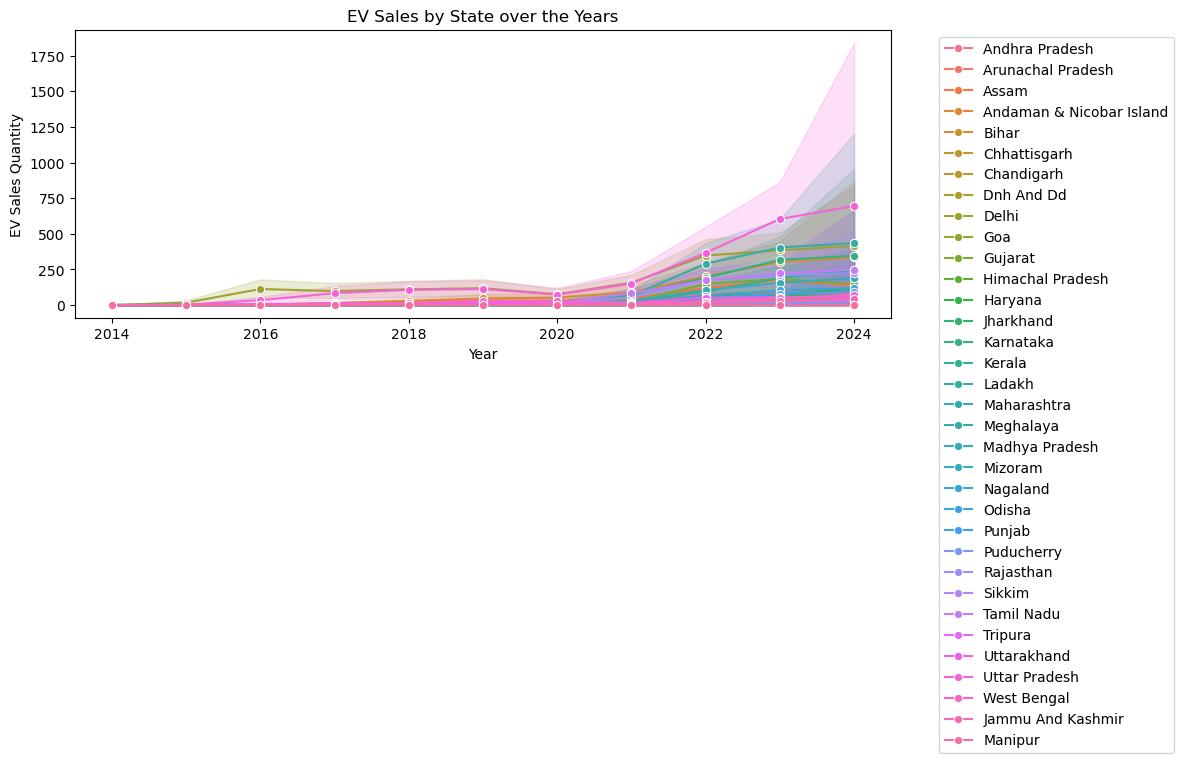

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. EV Sales by State over the Years ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=EV, x='Year', y='EV_Sales_Quantity', hue='State', marker='o')
plt.title('EV Sales by State over the Years')
plt.ylabel('EV Sales Quantity')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()



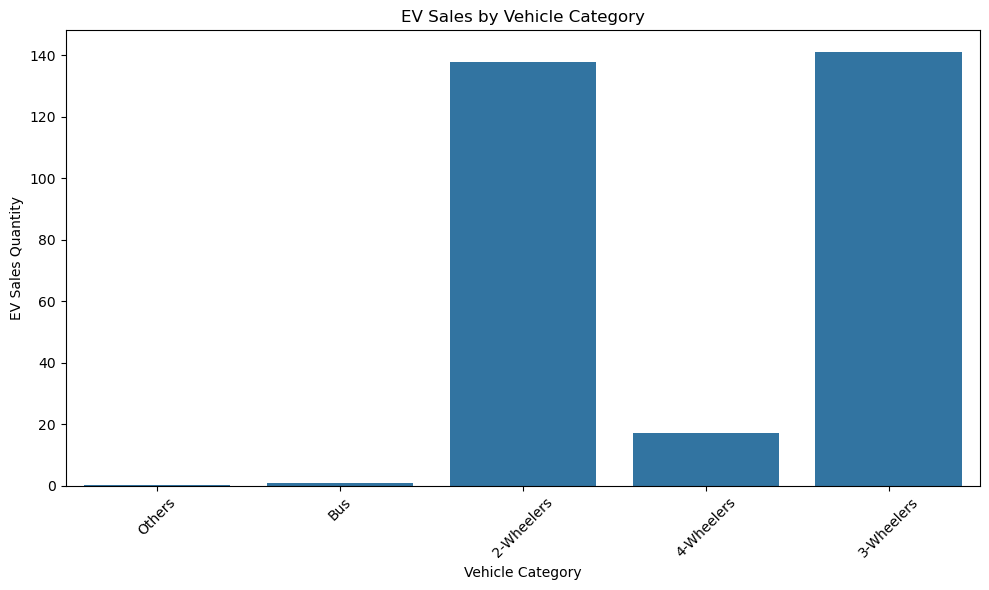

In [29]:
# --- EV Sales by Vehicle Category ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Vehicle_Category',
    y='EV_Sales_Quantity',
    data=EV,
    errorbar=None  # Replaces ci=None
)
plt.title('EV Sales by Vehicle Category')
plt.ylabel('EV Sales Quantity')
plt.xlabel('Vehicle Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
# --- 1. Extract Month and Day from the Date column ---
EV['Month'] = EV['Date'].dt.month
EV['Day'] = EV['Date'].dt.day

# --- 2. Encode categorical variables using one-hot encoding ---
EV_encoded = pd.get_dummies(
    EV,
    columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'],
    drop_first=True  # Avoid dummy variable trap
)

# --- 3. Drop unnecessary columns ---
EV_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

# --- 4. Check the first 5 rows after encoding ---
print(EV_encoded.head())


     Year  EV_Sales_Quantity  Month  Day  State_Andhra Pradesh  \
0  2014.0                0.0      1    1                  True   
1  2014.0                0.0      1    1                  True   
2  2014.0                0.0      1    1                  True   
3  2014.0                0.0      1    1                  True   
4  2014.0                0.0      1    1                  True   

   State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chandigarh  \
0                    False        False        False             False   
1                    False        False        False             False   
2                    False        False        False             False   
3                    False        False        False             False   
4                    False        False        False             False   

   State_Chhattisgarh  ...  Vehicle_Type_3W_Goods  \
0               False  ...                  False   
1               False  ...                  False   

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- 1. Split data into features and target ---
X = EV_encoded.drop('EV_Sales_Quantity', axis=1)
y = EV_encoded['EV_Sales_Quantity']

# --- 2. Split dataset into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. Instantiate the Random Forest model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)

# --- 4. Train the model ---
model.fit(X_train, y_train)

# --- 5. Make predictions ---
y_pred = model.predict(X_test)

# --- 6. Evaluate the model ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 130.52254687983276


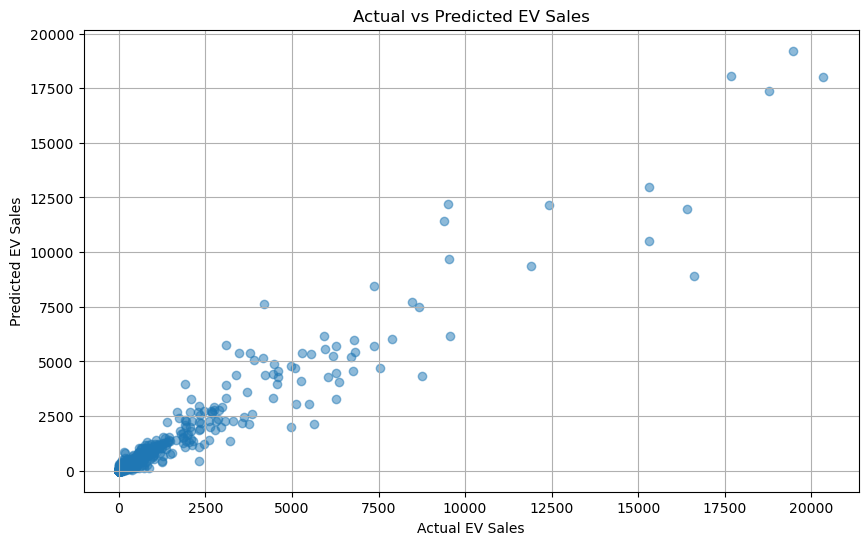

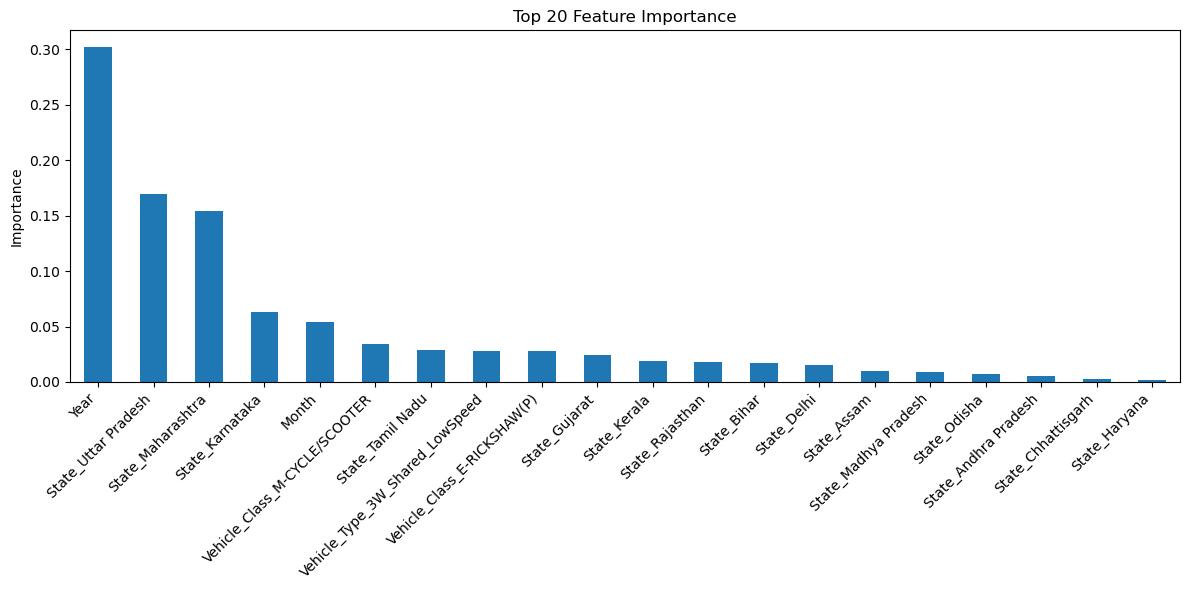

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Plot Actual vs Predicted EV Sales ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.grid(True)
plt.show()

# --- 2. Feature Importance ---
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

# --- 3. Plot the most important features ---
plt.figure(figsize=(12, 6))
feature_importance.head(20).plot(kind='bar')  # Show top 20 features
plt.title('Top 20 Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
